In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip


# Import

In [2]:
#OLD IMPORTS
#from keras import layers
#from keras import models
#from keras import optimizers
#from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
#from keras import applications

#NEW IMPORTS

# Data processing
import numpy as np
import pandas as pd 

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# Keras ve TensorFlow libraries
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical, Sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Albumentations (Data Augmentation)
import albumentations as A
from albumentations import (
    HorizontalFlip, VerticalFlip, ShiftScaleRotate, RandomBrightnessContrast, 
    Rotate, Compose, OneOf, GaussianBlur, CLAHE, RandomGamma, ElasticTransform
)

# Other
from PIL import Image
import os
import math

# constant value
np.random.seed(101)

In [3]:
#!pip install -U albumentations

# Load_data

In [4]:
import zipfile

zip_files = ['test', 'train']
# Will unzip the files so that you can see them..
for zip_file in zip_files:
    with zipfile.ZipFile("../input/dogs-vs-cats-redux-kernels-edition/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test unzipped
train unzipped


In [5]:
IMAGE_FOLDER_PATH="/kaggle/working/train"
images_name=os.listdir(IMAGE_FOLDER_PATH)

In [8]:
images_name

['dog.3855.jpg',
 'cat.6002.jpg',
 'cat.6646.jpg',
 'cat.2418.jpg',
 'dog.8570.jpg',
 'dog.8886.jpg',
 'cat.3747.jpg',
 'cat.5326.jpg',
 'cat.1584.jpg',
 'cat.5537.jpg',
 'dog.1452.jpg',
 'dog.7731.jpg',
 'dog.2464.jpg',
 'dog.9032.jpg',
 'cat.4820.jpg',
 'cat.5150.jpg',
 'dog.2637.jpg',
 'dog.5593.jpg',
 'cat.993.jpg',
 'dog.70.jpg',
 'cat.6801.jpg',
 'cat.1730.jpg',
 'dog.11281.jpg',
 'cat.1637.jpg',
 'dog.7328.jpg',
 'cat.4494.jpg',
 'cat.11004.jpg',
 'cat.440.jpg',
 'cat.2807.jpg',
 'cat.11329.jpg',
 'dog.3817.jpg',
 'dog.841.jpg',
 'cat.2331.jpg',
 'cat.3816.jpg',
 'cat.43.jpg',
 'cat.9012.jpg',
 'dog.10710.jpg',
 'dog.10309.jpg',
 'cat.1440.jpg',
 'dog.11257.jpg',
 'cat.2494.jpg',
 'cat.11443.jpg',
 'dog.9999.jpg',
 'cat.2250.jpg',
 'cat.4868.jpg',
 'cat.8948.jpg',
 'cat.8798.jpg',
 'dog.6095.jpg',
 'dog.7173.jpg',
 'dog.2863.jpg',
 'dog.2342.jpg',
 'dog.10552.jpg',
 'cat.9511.jpg',
 'dog.8999.jpg',
 'dog.2305.jpg',
 'dog.394.jpg',
 'dog.3259.jpg',
 'dog.5780.jpg',
 'dog.7068.jpg

In [6]:
full_path=os.path.join(IMAGE_FOLDER_PATH, images_name[0])
full_path

'/kaggle/working/train/dog.6583.jpg'

In [7]:
targets = []
full_paths = []
for image_name in images_name:
    target = image_name.split(".")[0]
    full_path=os.path.join(IMAGE_FOLDER_PATH, image_name)
    full_paths.append(full_path)
    targets.append(target)

df = pd.DataFrame()
df['image_path'] = full_paths
df['target'] = targets

In [8]:
test_path = '/kaggle/working/test'
images_name=os.listdir(test_path)
images_name

['886.jpg',
 '1646.jpg',
 '4661.jpg',
 '7983.jpg',
 '7673.jpg',
 '11772.jpg',
 '9612.jpg',
 '3111.jpg',
 '4729.jpg',
 '12346.jpg',
 '2016.jpg',
 '3328.jpg',
 '11269.jpg',
 '4784.jpg',
 '3815.jpg',
 '2125.jpg',
 '2427.jpg',
 '7767.jpg',
 '9569.jpg',
 '3688.jpg',
 '3990.jpg',
 '5698.jpg',
 '1396.jpg',
 '3777.jpg',
 '2653.jpg',
 '8989.jpg',
 '6169.jpg',
 '10310.jpg',
 '2990.jpg',
 '6421.jpg',
 '6288.jpg',
 '10659.jpg',
 '9161.jpg',
 '3370.jpg',
 '10265.jpg',
 '5758.jpg',
 '7050.jpg',
 '8143.jpg',
 '304.jpg',
 '9408.jpg',
 '2760.jpg',
 '11393.jpg',
 '11382.jpg',
 '11142.jpg',
 '4364.jpg',
 '12378.jpg',
 '1221.jpg',
 '9597.jpg',
 '4646.jpg',
 '11594.jpg',
 '7522.jpg',
 '212.jpg',
 '6256.jpg',
 '7560.jpg',
 '41.jpg',
 '5880.jpg',
 '4525.jpg',
 '10336.jpg',
 '386.jpg',
 '7261.jpg',
 '5530.jpg',
 '7137.jpg',
 '1472.jpg',
 '6760.jpg',
 '10104.jpg',
 '3490.jpg',
 '11096.jpg',
 '4186.jpg',
 '2880.jpg',
 '10742.jpg',
 '9453.jpg',
 '1062.jpg',
 '9590.jpg',
 '5144.jpg',
 '1388.jpg',
 '8986.jpg',
 '4

In [9]:
df_test = pd.DataFrame()
for inx, image_name in enumerate(images_name):
    full_path = os.path.join(test_path,image_name)
    df_test.loc[inx,'full_path'] = full_path

In [13]:
df_test

full_path
0      /kaggle/working/test/5971.jpg
1       /kaggle/working/test/949.jpg
2      /kaggle/working/test/9531.jpg
3       /kaggle/working/test/509.jpg
4      /kaggle/working/test/7005.jpg
...                              ...
12495  /kaggle/working/test/5157.jpg
12496  /kaggle/working/test/4595.jpg
12497   /kaggle/working/test/419.jpg
12498  /kaggle/working/test/6661.jpg
12499  /kaggle/working/test/8468.jpg

[12500 rows x 1 columns]

In [14]:
df

image_path target
0       /kaggle/working/train/dog.3855.jpg    dog
1       /kaggle/working/train/cat.6002.jpg    cat
2       /kaggle/working/train/cat.6646.jpg    cat
3       /kaggle/working/train/cat.2418.jpg    cat
4       /kaggle/working/train/dog.8570.jpg    dog
...                                    ...    ...
24995   /kaggle/working/train/cat.2534.jpg    cat
24996   /kaggle/working/train/dog.3633.jpg    dog
24997  /kaggle/working/train/dog.11332.jpg    dog
24998   /kaggle/working/train/dog.9069.jpg    dog
24999  /kaggle/working/train/cat.11241.jpg    cat

[25000 rows x 2 columns]

In [10]:
df['target'].value_counts()

target
dog    12500
cat    12500
Name: count, dtype: int64

# Creating a photo gallery

In [11]:
WIDTH,HEIGHT = 150,150

In [12]:
#add white line between two image
def get_side(img, side_type, side_size=5):
    height, width, channel=img.shape
    if side_type=="horizontal":
        return np.ones((height,side_size,3), dtype=np.float32)*255
        
    return np.ones((side_size, width,  channel), dtype=np.float32)*255

In [17]:
def show_gallery(show="both"):
    n=100
    counter=0
    images=list()
    vertical_images=[]
    rng_state = np.random.get_state() # random sayi uruetmini sabitlemek icin 
    np.random.shuffle(full_paths) #pathleri karistir
    np.random.set_state(rng_state) #random sayi uretirken ayni sayilari uretmesi icin rngyi kullan
    np.random.shuffle(targets) #hedefleri de bu sekilde karistir
    for path, target in zip(full_paths, targets): #iki farklı listeyi (full_paths ve targets) aynı anda döngüye sok
        if target!=show and show!="both":
            continue
        counter=counter+1
        if counter%100==0:
            break
        #Image loading from disk as JpegImageFile file format
        img=load_img(path, target_size=(WIDTH,HEIGHT)) #150,150
        #Converting JpegImageFile to numpy array
        img=img_to_array(img)
        
        hside=get_side(img, side_type="horizontal")
        images.append(img)
        images.append(hside)

        if counter%10==0:
            himage=np.hstack((images)) #iki veya daha fazla diziyi yatay olarak (sütun bazında) birleştirir
            vside=get_side(himage, side_type="vertical")
            vertical_images.append(himage)
            vertical_images.append(vside)
            
            images=list()

    gallery=np.vstack((vertical_images)) 
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    title={"both":"Dogs and Cats",
          "cat": "Cats",
          "dog": "Dogs"}
    plt.title("100 samples of {} of the dataset".format(title[show]))
    plt.imshow(gallery.astype(np.uint8))

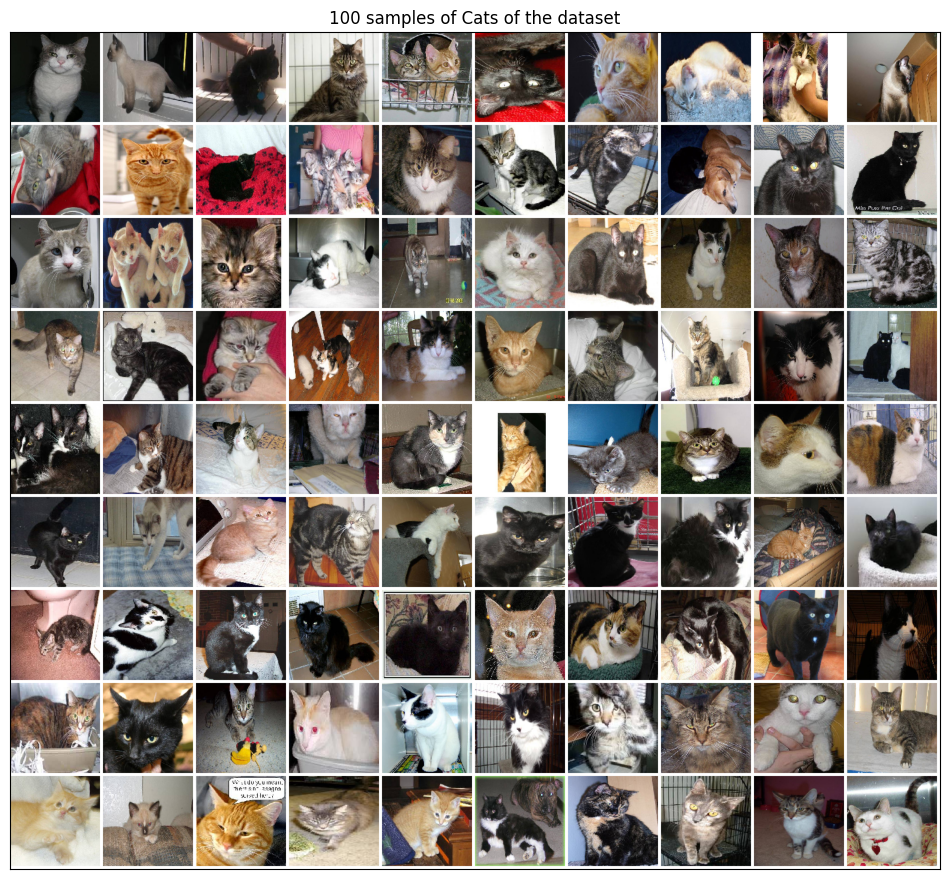

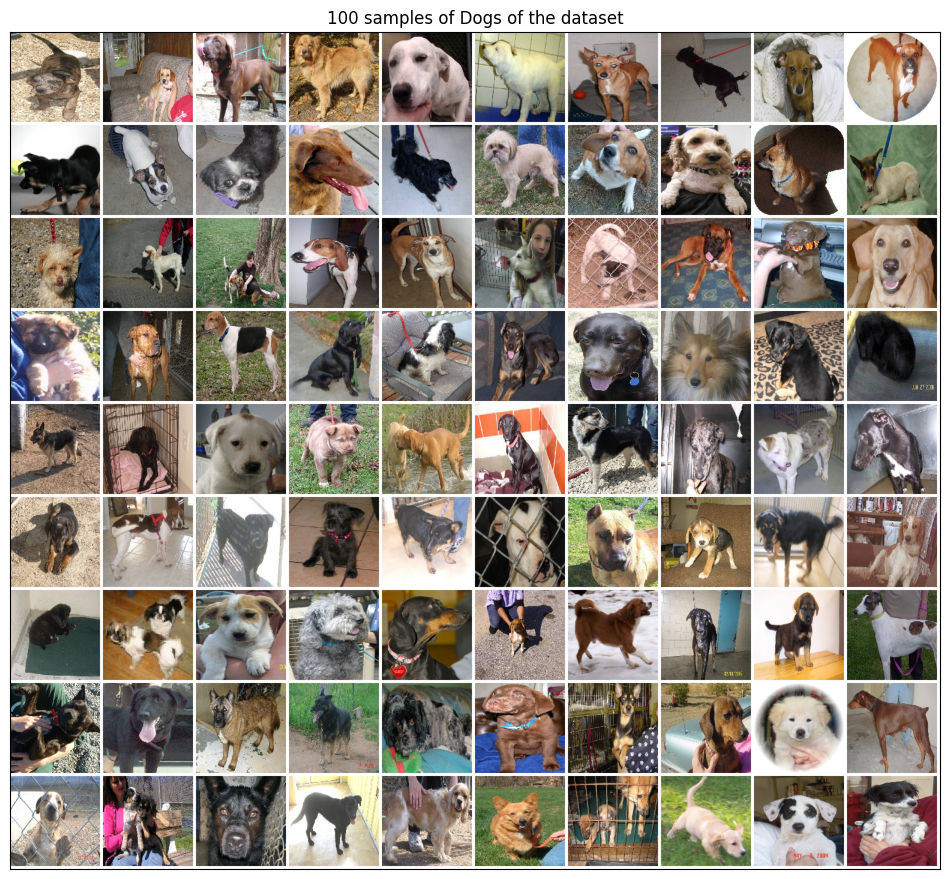

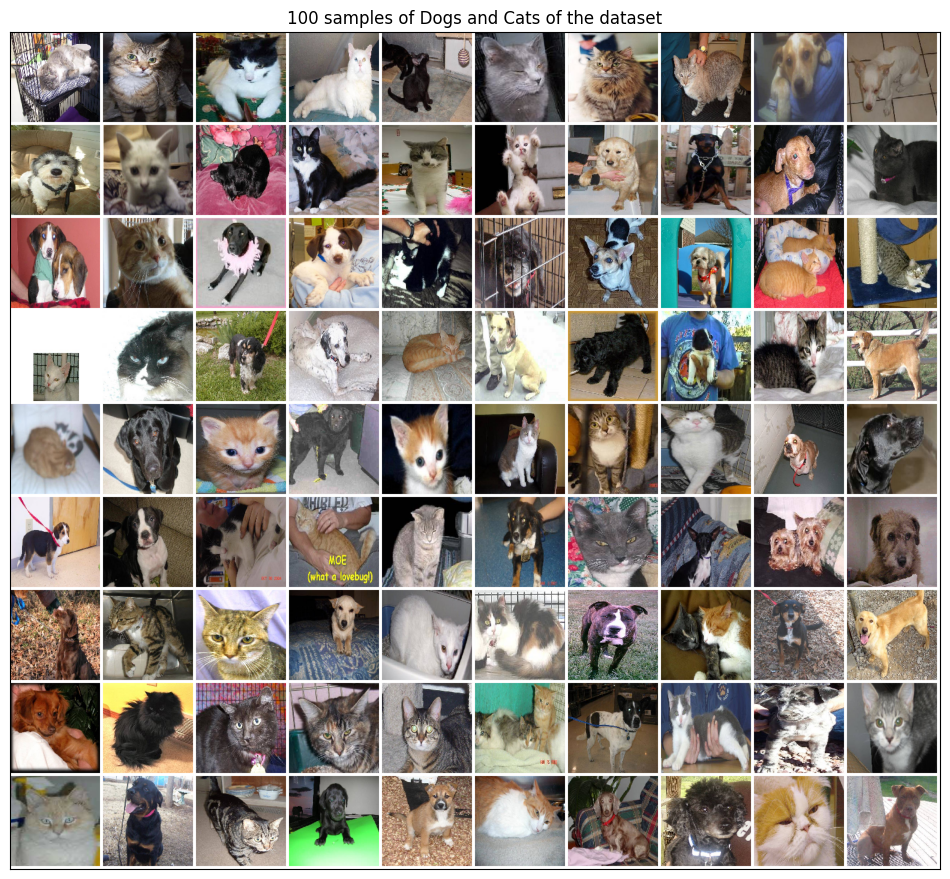

In [21]:
show_gallery(show="cat")
show_gallery(show="dog")
show_gallery()

## img to Array

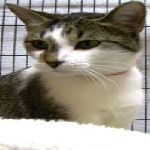

In [23]:
first_image_path = df['image_path']
img = load_img(first_image_path, target_size=(150, 150))
img

## img_to_array

In [24]:
img = img_to_array(img)
img

array([[[211., 210., 228.],
        [219., 220., 238.],
        [215., 217., 232.],
        ...,
        [236., 241., 247.],
        [233., 240., 246.],
        [231., 238., 244.]],

       [[198., 198., 210.],
        [201., 201., 213.],
        [204., 204., 216.],
        ...,
        [230., 237., 245.],
        [221., 228., 236.],
        [231., 238., 246.]],

       [[208., 209., 214.],
        [219., 220., 225.],
        [208., 209., 213.],
        ...,
        [231., 240., 249.],
        [224., 232., 243.],
        [233., 241., 252.]],

       ...,

       [[255., 252., 241.],
        [252., 248., 237.],
        [249., 245., 234.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[252., 247., 244.],
        [250., 245., 241.],
        [245., 240., 236.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[230., 224., 228.],
        [231., 225., 229.],
        [231., 2

In [25]:
img.shape

(150, 150, 3)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  25000 non-null  object
 1   target      25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


# Seperate Train Dataset

In [13]:
y_train = df['target']
X_train = df['image_path']
del df #free some spaces

target
dog    12500
cat    12500
Name: count, dtype: int64

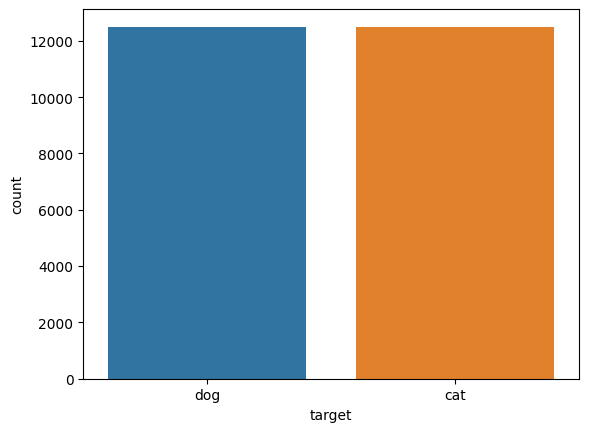

In [14]:
sns.countplot(x=y_train)
y_train.value_counts()

In [15]:
y_train[y_train.isna()]

Series([], Name: target, dtype: object)

In [16]:
X_train.head()

0     /kaggle/working/train/dog.6583.jpg
1     /kaggle/working/train/cat.6734.jpg
2    /kaggle/working/train/cat.11536.jpg
3     /kaggle/working/train/dog.2134.jpg
4     /kaggle/working/train/cat.4587.jpg
Name: image_path, dtype: object

# Normalization
## Don't do that
### these things will waste your memory because when you run this all of the photos will load by your Ram. Ram will full and it is occur some error.

In [ ]:
#X_train_image_list = list()
#for i in X_train:
#    image = load_img(i,target_size = (150,150))
#    array = img_to_array(image)/255.0
#    X_train_image_list.append(array)
#
#X_train_image_list = np.array(X_train_image_list)

In [ ]:
#df_test_image_list = list()
#for i in test:
#    image = load_img(i,target_size = (150,150))
#    array = img_to_array(image)/255.0
#    df_test_image_list.append(array)
#
#df_test_image_list = np.array(df_test_image_list)

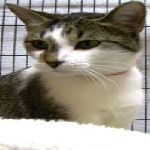

In [38]:
first_image = load_img(X_train[0],target_size = (150,150))
first_image

In [39]:
y_train[0]

'cat'

# Label encoding

In [17]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# One-hot encoding işlemi
y_train_one_hot = to_categorical(y_train_encoded, num_classes=2)

print(y_train_encoded)  # [0 1 0 1 0]
print(y_train_one_hot)  # i will use one_hot because ther ara only 2 class

[1 0 0 ... 1 1 0]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [18]:
X_train_path = X_train

In [19]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train_path, y_train_encoded,
                                                 test_size=0.2,
                                                 random_state=101)

In [20]:
print(f"len of the X_train: {len(X_train)}")
print(f"len of the X_val: {len(X_val)}")
print(f"len of the Y_train: {len(Y_train)}")
print(f"len of the Y_val: {len(Y_val)}")

len of the X_train: 20000
len of the X_val: 5000
len of the Y_train: 20000
len of the Y_val: 5000


# CNN

In [59]:
model = models.Sequential()

# Konvolüsyonel katman ve max pooling
model.add(Input(shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #learn shape side etc.
model.add(layers.Conv2D(32,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2))) #make the image smaller but keep the important features
#avoid overfitting
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten()) #multi dim to one dim
model.add(layers.Dense(256, activation="relu")) #fully connected layer 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 146, 146, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 73, 73, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       7,373,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,660,961 (29.22 MB)

 Trainable params: 7,660,641 (29.22 MB)

 Non-trainable params: 320 (1.25 KB)

In [60]:
#Adam combines RMSprop's adaptive learning rate approach with the Momentum algorithm.
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# whe use RMSprop when we work with  RNN model  (or. LSTM, GRU).
#
#optimizer = RMSprop(learning_rate =0.001, rho=0.9, epsilon=1e-08)
#
#
#model.compile(loss="binary_crossentropy", 
#             optimizer=optimizer,
#             metrics=["accuracy"])
#print("[INFO]: model compiled...")

# Data augmentation

I will use Albumentations for faster GPU performance

In [21]:
train_transforms = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),  # Changes brightness and contrast randomly
    A.Rotate(limit=15, p=0.5),          # Rotates images between -15 and 15 degrees
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=15, p=0.5),# Panning, scaling
    A.HorizontalFlip(p=0.5),           # horizontal flip
   A.OneOf([
        A.GaussianBlur(blur_limit=(3, 7), p=0.5),
        A.CLAHE(clip_limit=2.0, p=0.5)
    ], p=0.5), #Contrast Limited Adaptive Histogram Equalization
    
    #the means of p parameter is %50 chance to apply.
])

### to visualize Multiple image:

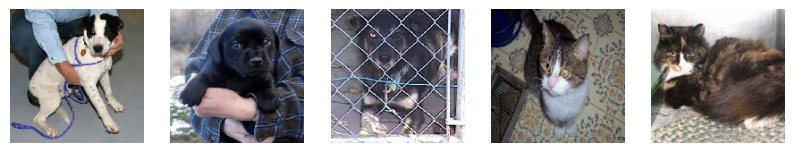

In [46]:
plt.figure(figsize=(10,5))
for i , image in enumerate(X_train[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()

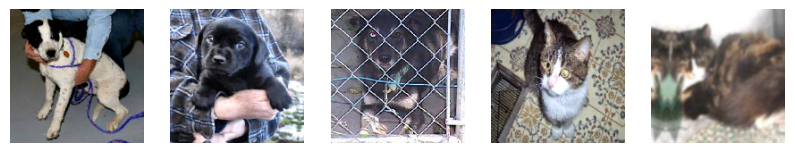

In [47]:
plt.figure(figsize=(10,5))
for i , image in enumerate(X_train_augted[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()

for avoid waste of memory

In [22]:
class CustomDataGenerator(Sequence):
    def __init__(self, images, labels, batch_size, transforms=None, shuffle=True,**kwargs):
        
        assert len(images) == len(labels), "Lengths of Images and Labels arrays do not match!"
        super().__init__(**kwargs)
        self.images = np.array(images)  # Görselleri numpy dizisine çeviriyoruz
        self.labels = np.array(labels)  # Etiketleri numpy dizisine çeviriyoruz
        self.batch_size = batch_size  # Batch boyutu
        self.transforms = transforms  # Veri artırma işlemleri (opsiyonel)
        self.shuffle = shuffle  # Veriyi karıştırma
        self.indices = np.arange(len(self.images))  # Başlangıçta bütün indeksleri tutar
        self.on_epoch_end()  # Epok sonrasında veriyi karıştırma


    def __len__(self):
        return int(np.ceil(len(self.images) / self.batch_size))
        
    def __getitem__(self, index):
        # Used to get a batch
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = [self.images[i] for i in batch_indices]
        batch_labels = [self.labels[i] for i in batch_indices]

        # Data augmentation
        if self.transforms:
            batch_images = [self.augment_image(img) for img in batch_images]
        else:
            batch_images = [self.no_augment_image(img) for img in batch_images]

        return np.array(batch_images), np.array(batch_labels)

    def augment_image(self, image_path):
        image = Image.open(image_path)
        image = image.resize((150,150))
        image = np.array(image)
        image = image.astype(np.uint8)
        
        augmented = self.transforms(image=image)
        return augmented['image']/255.0

    def no_augment_image(self,image_path):
        image = Image.open(image_path)
        image = image.resize((150,150))
        image = np.array(image)
        image = image.astype(np.uint8)/255.0
        return image
    
    def on_epoch_end(self):
        self.indices = np.arange(len(self.images))
        if self.shuffle:
            np.random.shuffle(self.indices)


In [23]:
batch_size = 32
train_generator = CustomDataGenerator(X_train, Y_train, batch_size, transforms=train_transforms)
val_generator = CustomDataGenerator(X_val, Y_val, batch_size, transforms=None)

In [116]:
len(train_generator) #625*32 = 20k

625

you can not see the image you will use this generated image in fittin prosses.

# Fit the  model

In [117]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, #kacinci epochstan sonra azaltilmaya baslayacak
                                            verbose=1, 
                                            factor=0.5, #ne kadar azaltilacak.
                                            min_lr=0.00001) #nereye kadar azaltilabilir
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss'),
    learning_rate_reduction
]

In [118]:
history = model.fit(
    train_generator, 
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 288ms/step - accuracy: 0.5531 - loss: 2.5374 - val_accuracy: 0.5030 - val_loss: 1.8008 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 273ms/step - accuracy: 0.6329 - loss: 0.6390 - val_accuracy: 0.6890 - val_loss: 0.5908 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 279ms/step - accuracy: 0.6727 - loss: 0.6015 - val_accuracy: 0.6928 - val_loss: 0.5718 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 277ms/step - accuracy: 0.6951 - loss: 0.5776 - val_accuracy: 0.6844 - val_loss: 0.5936 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 272ms/step - accuracy: 0.7095 - loss: 0.5667 - val_accuracy: 0.7550 - val_loss: 0.5074 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 274ms/step - accuracy: 0.7275 - loss: 0.5448 - val_accuracy: 0.5734 - val_loss: 1.2112 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 274ms/step - accura

In [27]:
#model = load_model('/kaggle/input/cat-and-dog_model/keras/default/1/my_model.h5')

In [32]:
def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validatin Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history["Validatin Accuracy"]=modelHistory.history['val_accuracy']
  
    history.plot(figsize=(12,8))
    plt.title(" Convulutional Model: {} Train and Validation Loss and Accuracy History".format(model_name))
    plt.show()

# Model evaluation on test data set

In [28]:
test = df_test['full_path'] #to change the type of test dataset

In [44]:
def preprocess_image(image_path, target_size=(150, 150)):  
    img = load_img(image_path, target_size=target_size)  
    img_array = img_to_array(img)  
    img_array = img_array / 255.0
    return img_array

test_images = np.array([preprocess_image(img_path) for img_path in test])

In [33]:
def no_augment_image(image_path):
        image = Image.open(image_path)
        image = image.resize((150,150))
        image = np.array(image)
        image = image.astype(np.uint8)/255.0
        return image


def batch_test_data_generator(image_paths, batch_size):
    batch = []
    for img_path in image_paths:
        batch.append(no_augment_image(img_path))
        if len(batch) == batch_size:
            yield np.array(batch)
            batch = []
    if batch:
        yield np.array(batch)


predictions = []
batch_size = 32
test_batch_generator = batch_test_data_generator(test, batch_size)

for test_batch in test_batch_generator:
    preds = model.predict(test_batch)
    predictions.extend(preds)

predictions = np.array(predictions)
predicted_classes = (predictions > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━

In [34]:
print("Predictions (probabilities):\n", predictions[:10])
print("Predicted classes:\n", predicted_classes[:10])

Predictions (probabilities):
 [[9.9999988e-01]
 [9.9989247e-01]
 [9.9999988e-01]
 [1.0000000e+00]
 [6.4286869e-06]
 [9.9769515e-01]
 [1.0109934e-01]
 [9.9999118e-01]
 [2.5670681e-11]
 [2.7335174e-05]]
Predicted classes:
 [[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]


In [136]:
package_size = math.ceil(12500/32)
package_size

391

# Training and validation curves

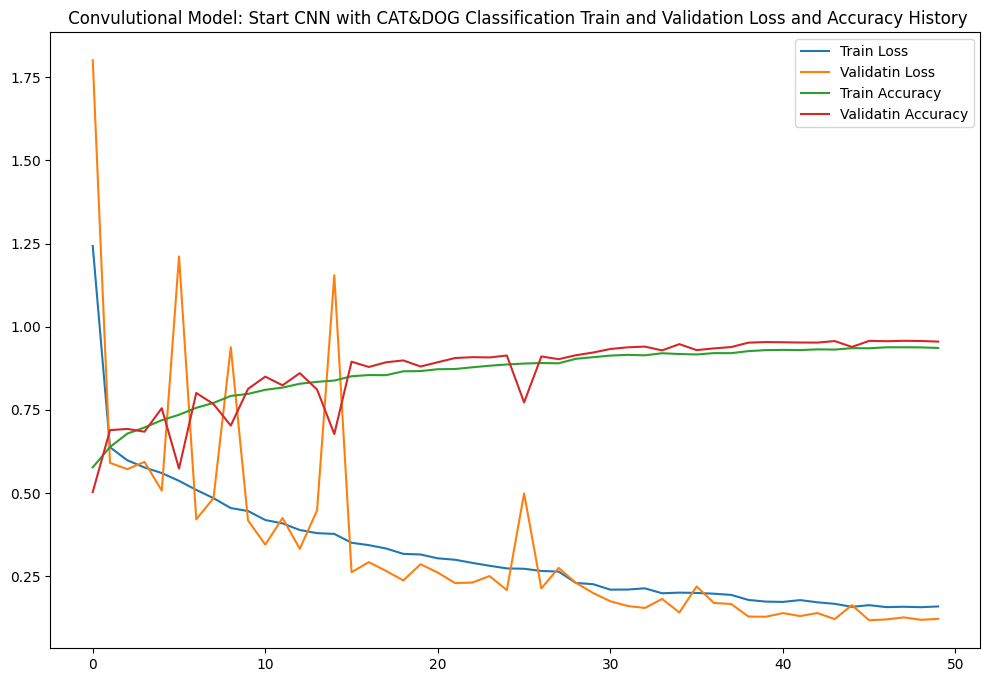

In [139]:
show_model_history(history,'Start CNN with CAT&DOG Classification')

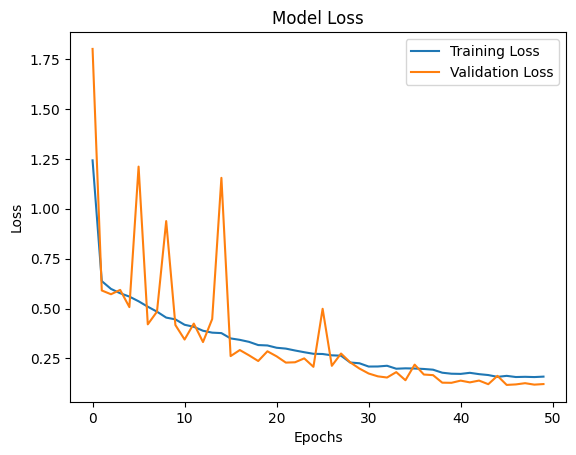

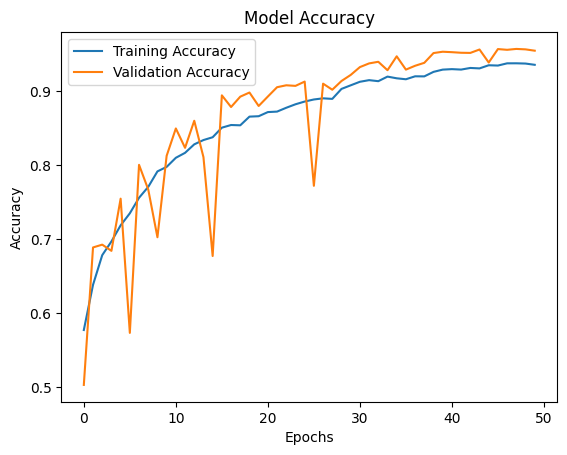

In [140]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybını görselleştir
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğunu görselleştir (varsa)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


# Karışıklık Matrisi (Confusion Matrix)
Eğer sınıflandırma problemi çözüyorsanız, karışıklık matrisiyle daha detaylı bir analiz yapabilirsiniz.

In [24]:
val_gen = CustomDataGenerator(X_val, Y_val, 50, transforms=None)

In [40]:
X_train

6167      /kaggle/working/train/cat.6447.jpg
3101      /kaggle/working/train/dog.9037.jpg
17307     /kaggle/working/train/cat.8581.jpg
3950      /kaggle/working/train/dog.3955.jpg
893       /kaggle/working/train/cat.5871.jpg
                        ...                 
5695     /kaggle/working/train/dog.12075.jpg
8006      /kaggle/working/train/dog.3856.jpg
17745     /kaggle/working/train/cat.9522.jpg
17931     /kaggle/working/train/dog.2923.jpg
13151     /kaggle/working/train/dog.2548.jpg
Name: image_path, Length: 20000, dtype: object

In [41]:
X_train

6167      /kaggle/working/train/cat.6447.jpg
3101      /kaggle/working/train/dog.9037.jpg
17307     /kaggle/working/train/cat.8581.jpg
3950      /kaggle/working/train/dog.3955.jpg
893       /kaggle/working/train/cat.5871.jpg
                        ...                 
5695     /kaggle/working/train/dog.12075.jpg
8006      /kaggle/working/train/dog.3856.jpg
17745     /kaggle/working/train/cat.9522.jpg
17931     /kaggle/working/train/dog.2923.jpg
13151     /kaggle/working/train/dog.2548.jpg
Name: image_path, Length: 20000, dtype: object

# Error Analysis
You can ensure poor retention of the model by examining examples that cannot be predicted correctly.

**0 = Cat**

**1 = Dog**

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 392ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

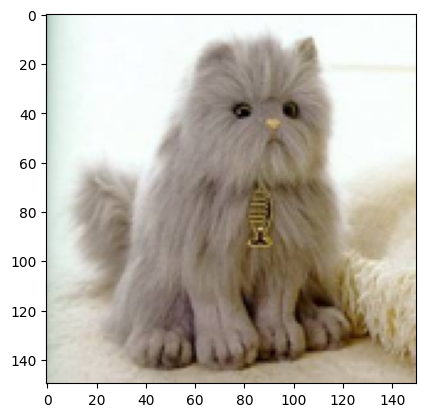

Örnek 2:
Gerçek Etiket: 1
Tahmin Edilen Etiket: [0]


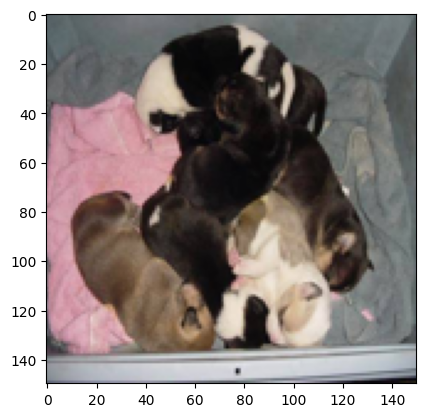

Örnek 3:
Gerçek Etiket: 0
Tahmin Edilen Etiket: [1]


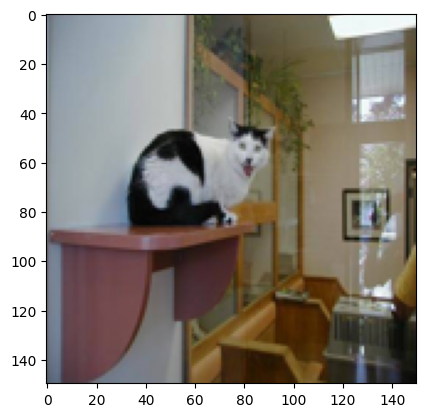

Örnek 4:
Gerçek Etiket: 1
Tahmin Edilen Etiket: [0]


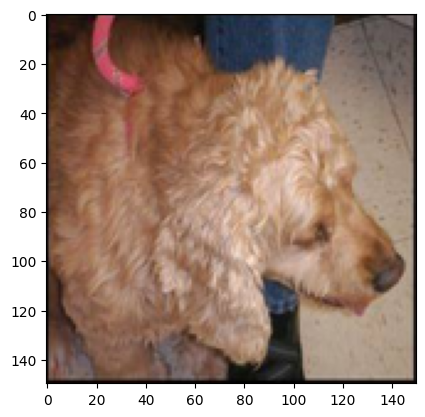

Örnek 5:
Gerçek Etiket: 0
Tahmin Edilen Etiket: [1]


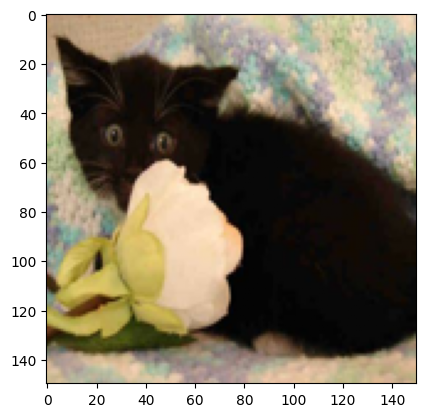

In [30]:
wrong_predictions = []
batch_size = 32


for batch_images, batch_target in val_gen:
    if batch_images.shape[0] == 0:
        print("if there isn't any data then break")
        break
    
    preds = model.predict(batch_images)
    y_pred_classes = (preds > 0.5).astype(int)
    y_true = batch_target

    for i in range(len(y_true)):
        if y_true[i] != y_pred_classes[i]:  # Eğer doğru tahmin edilmediyse
            wrong_predictions.append({
                'image': batch_images[i],  # Yanlış tahmin edilen görsel
                'true_label': y_true[i],
                'predicted_label': y_pred_classes[i]
            })

# Yanlış tahmin edilen ilk 5 örneği görselleştirmek
for i, wrong in enumerate(wrong_predictions[:5]):
    print(f"Örnek {i+1}:")
    print(f"Gerçek Etiket: {wrong['true_label']}")
    print(f"Tahmin Edilen Etiket: {wrong['predicted_label']}")
    plt.imshow(wrong['image'])
    plt.show()
